In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'msft' # ticker symbol
train = 1 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1 day ahead
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'aapl':'12/12/1980' # Updated 1/1/21
               , 'acy': '01/18/1998' # Updated 1/1/21
               , 'amd': '03/17/1980' # Updated 1/1/21
               , 'baba': '09/15/2014' # Updated 1/1/21
               , 'bac': '02/19/1973' # Updated 1/1/21
               , 'crm': '06/23/2004' # Updated 1/1/21
               , 'esgv': '09/16/2018' # Updated 1/1/21
               , 'goog': '08/16/2004' # Updated 1/1/21
               , 'ibm': '01/02/1962' # Updated 1/1/21
               , 'idex': '05/23/2007' # Updated 1/1/21
               , 'intc': '03/16/1980' # Updated 1/1/21
               , 'iyw': '05/15/2000' # Updated 1/1/21
               , 'ma': '05/21/2006' # Updated 1/1/21
               , 'msft': '03/10/1986' # Updated 1/1/21
               , 'nio': '09/10/2018'
               , 'nvda': '01/22/1999'
               , 'pypl': '07/05/2015'
               , 'tsla': '06/29/2010'
               , 'v': '03/16/2008'
               , 'vbiv': '09/04/2002'
               , 'vgt': '01/26/2004'
              }
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)

In [4]:
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-17,220.889999,217.919998,219.869995,219.419998,32515800.0,219.419998,0.002047,0.013629,0.000638,0.010230,0.008357,-1
2020-12-18,219.690002,216.020004,218.589996,218.589996,63354900.0,218.589996,0.000000,0.016989,-0.003783,0.011043,0.004998,1
2020-12-21,224.000000,217.279999,217.550003,222.589996,37181900.0,222.589996,-0.023167,0.030928,0.018299,0.012508,0.007776,-1
2020-12-22,225.630005,221.850006,222.690002,223.940002,22612200.0,223.940002,-0.005613,0.017039,0.006065,0.011778,0.009054,-1
2020-12-23,223.559998,220.800003,223.110001,221.020004,18699600.0,221.020004,0.009368,0.012500,-0.013039,0.011651,0.001636,1
2020-12-24,223.610001,221.199997,221.419998,222.750000,10550600.0,222.750000,-0.006007,0.010895,0.007827,0.011937,0.003074,1
2020-12-28,226.029999,223.020004,224.449997,224.960007,17933500.0,224.960007,-0.002272,0.013497,0.009921,0.011536,0.005815,-1
2020-12-29,227.179993,223.580002,226.309998,224.149994,17403200.0,224.149994,0.009544,0.016102,-0.003601,0.009607,0.001435,-1
2020-12-30,225.630005,221.470001,225.229996,221.679993,20272300.0,221.679993,0.015762,0.018784,-0.011019,0.010541,-0.001982,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

/home/david/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.71639586 0.71639586 0.71639586]
  warnings.warn(


In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

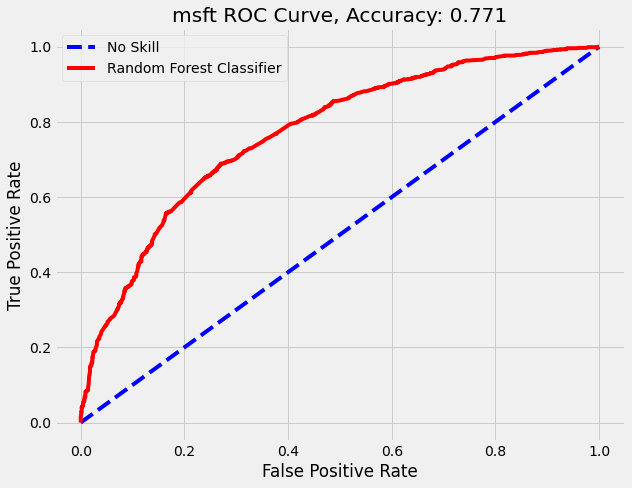

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

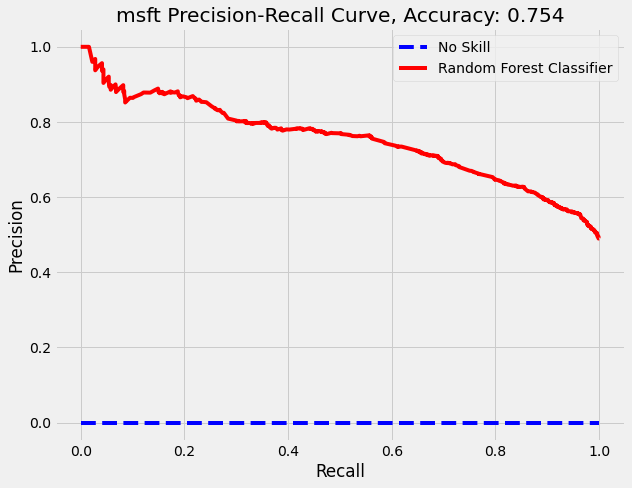

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

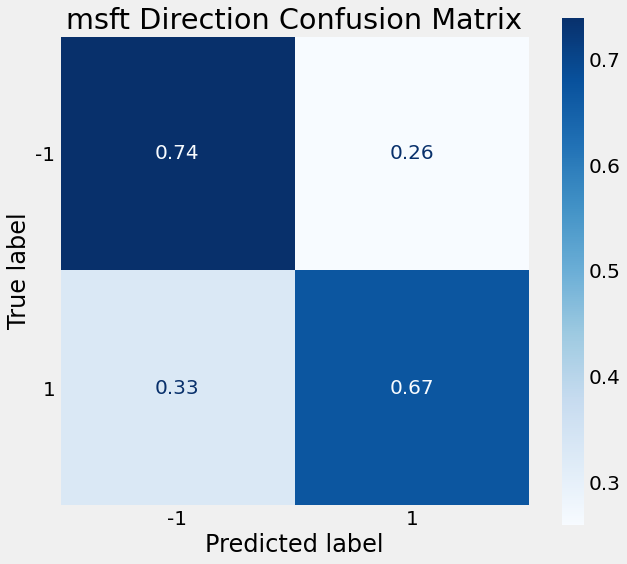

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.7137619106779647'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          2.230000e+02
Low           2.196800e+02
Open          2.217000e+02
Close         2.224200e+02
Volume        2.092690e+07
Adj Close     2.224200e+02
oc           -3.247637e-03
hl            1.511293e-02
adj           3.338170e-03
5stdev_adj    8.615021e-03
5sma_adj      1.293371e-03
direction    -1.000000e+00
Name: 2020-12-31 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-1]
last

oc           -0.003248
hl            0.015113
5stdev_adj    0.008615
5sma_adj      0.001293
Name: 2020-12-31 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    8769.000000
mean        0.001165
std         0.021492
min        -0.301158
25%        -0.009216
50%         0.000357
75%         0.011331
max         0.195652
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name}')
else:
    print(f'Sell or hold {stock_name}')

Sell or hold msft


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-24,223.610001,221.199997,221.419998,222.750000,10550600.0,222.750000,-0.006007,0.010895,0.007827,0.011937,0.003074,1,-1,-0.009921
2020-12-28,226.029999,223.020004,224.449997,224.960007,17933500.0,224.960007,-0.002272,0.013497,0.009921,0.011536,0.005815,-1,-1,0.003601
2020-12-29,227.179993,223.580002,226.309998,224.149994,17403200.0,224.149994,0.009544,0.016102,-0.003601,0.009607,0.001435,-1,1,-0.011019
2020-12-30,225.630005,221.470001,225.229996,221.679993,20272300.0,221.679993,0.015762,0.018784,-0.011019,0.010541,-0.001982,1,1,0.003338
2020-12-31,223.000000,219.679993,221.699997,222.419998,20926900.0,222.419998,-0.003248,0.015113,0.003338,0.008615,0.001293,-1,-1,-0.000357


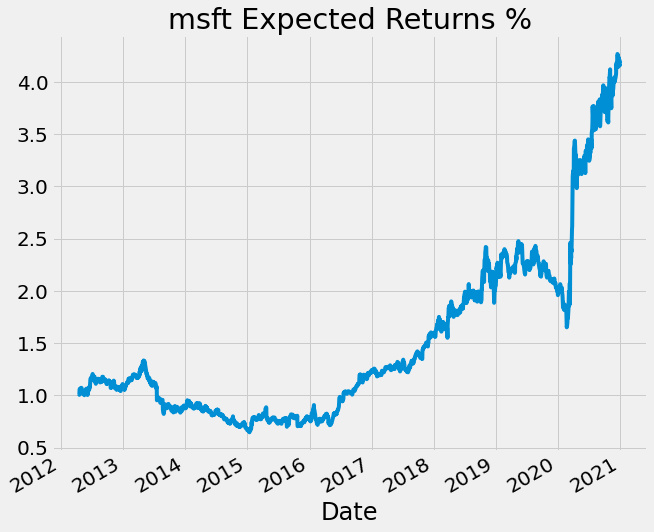

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

6.9187574375504655

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) /stock_df['Close'][-test_idx]

54.49660773026316

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/